In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import linear_model
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn import ensemble
from sklearn import metrics
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score

from sklearn.linear_model import LinearRegression,Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,23.99
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.60
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.40
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.20
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.90


- `CRIM`: per capita crime rate by town
- `ZN`: proportion of residential land zoned for lots over 25,000 sq.ft.
- `INDUS`: proportion of non-retail business acres per town.
- `CHAS`: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- `NOX`: nitric oxides concentration (parts per 10 million)
- `RM`: average number of rooms per dwelling
- `AGE`: proportion of owner-occupied units built prior to 1940
- `DIS`: weighted distances to five Boston employment centres
- `RAD`: index of accessibility to radial highways
- `TAX`: full-value property-tax rate per 10,000 (in dollars)
- `PTRATIO`: pupil-teacher ratio by town
- `B`: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- `LSTAT`: % lower status of the population
- `MEDV`: Median value of owner-occupied homes in 1000's (in dollars)

In [4]:
X = df_train[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']]
y = df_train['medv']

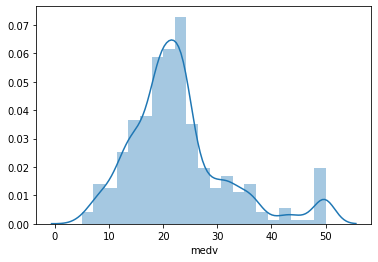

In [5]:
sns.distplot(y, kde=True) 

In [16]:
# define some handy analysis support function
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score

def plot_prediction_analysis(y, y_pred, figsize=(10,4), title=''):
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    axs[0].scatter(y, y_pred)
    mn = min(np.min(y), np.min(y_pred))
    mx = max(np.max(y), np.max(y_pred))
    axs[0].plot([mn, mx], [mn, mx], c='red')
    axs[0].set_xlabel('$y$')
    axs[0].set_ylabel('$\hat{y}$')
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    evs = explained_variance_score(y, y_pred)
    r2 = r2_score(y, y_pred)
    axs[0].set_title('rmse = {:.2f}, evs = {:.2f}, r2 = {:,.2f}'.format(rmse, evs, r2))
    
    axs[1].hist(y-y_pred, bins=50)
    avg = np.mean(y-y_pred)
    std = np.std(y-y_pred)
    axs[1].set_xlabel('$y - \hat{y}$')
    axs[1].set_title('Histrogram prediction error, $\mu$ = {:.2f}, $\sigma$ = {:.2f}'.format(avg, std))
    
    if title!='':
        fig.suptitle(title)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((249, 13), (84, 13), (249,), (84,))

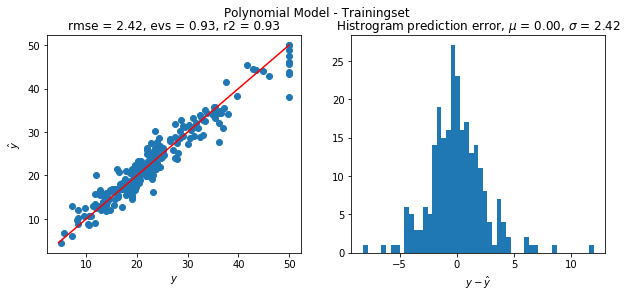

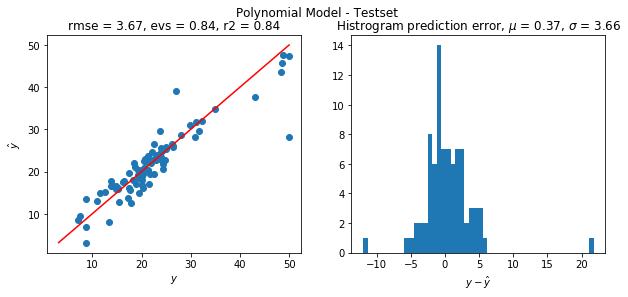

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

#model = LinearRegression()

model = Pipeline([
                ("scaler", StandardScaler()),
                ("poly", PolynomialFeatures(degree=2)),
                ("lin_reg", Lasso(alpha=0.04))
])

model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_train_predict

plot_prediction_analysis(y_train, y_train_predict, title='Polynomial Model - Trainingset')

y_test_pred = model.predict(X_test)
plot_prediction_analysis(y_test, y_test_pred, title='Polynomial Model - Testset')

In [11]:
# define dataset
XTEST = df_test[["crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","black","lstat"]]

XTEST.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.92
4,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [12]:
y_pred_final = model.predict(XTEST)

submission = pd.DataFrame(
    {
        'ID': df_test["ID"], 
        'MEDV': y_pred_final
    },
    columns = ['ID', 'MEDV'])
submission.to_csv('submission.csv', index = False)
submission.head()

,ID,MEDV
0,3,33.000870
1,6,25.999098
2,8,16.004931
3,9,16.155180
4,10,15.954149
